In [2]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate
pd.set_option('display.max_columns', None)

print(tf.test.gpu_device_name())

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# List the paths of the CSV files you want to combine
file_paths = ["E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00130-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00131-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00132-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv"]

# Read the CSV files into individual DataFrames
dataframes = [spark.read.csv(file_path, header=True, inferSchema=True) for file_path in file_paths]

# Combine the DataFrames into a single DataFrame
combined_df = dataframes[0]
for df in dataframes[1:]:
    combined_df = combined_df.union(df)

# Write the combined DataFrame to a single CSV file
output_path = 'combined_file.csv'
combined_df.coalesce(1).write.csv(output_path, header=True, mode='overwrite')


In [4]:
df = pd.read_csv(r"C:\Users\nvnS\combined_file.csv\part-00000-017d2fab-c9b4-4d09-9dc2-212fb33b977b-c000.csv")
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,182.00,17.00,64.00,22.362751,22.362751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1911.00,182.0,182.00,182.000000,0.000000,182.00,8.300743e+07,9.5,19.078784,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
1,2.437778,129.60,6.00,64.00,0.978382,0.978382,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.40,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.336252e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
2,0.000000,54.00,6.00,64.00,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.00,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.334496e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
3,0.453670,39173.00,17.00,64.00,4967.422026,4967.422026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.0,50.00,50.000000,0.000000,50.00,8.310643e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
4,0.000000,54.00,6.00,64.00,166.930829,166.930829,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.00,0.0,1.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.331469e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-PSHACK_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941802,0.002760,55.10,6.11,63.57,10.025180,10.025180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.80,54.0,54.80,54.043402,0.181119,54.20,8.303770e+07,9.5,10.396511,0.257655,0.830222,0.04,141.55,DDoS-TCP_Flood
941803,9.817769,162.00,6.00,64.00,0.305568,0.305568,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.298588e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-SYN_Flood
941804,0.135718,43416.74,16.89,64.00,14379.992944,14379.992944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,527.16,50.0,52.16,50.138687,0.527399,50.24,8.348742e+07,9.5,10.013823,0.747672,3.122454,0.09,141.55,DDoS-UDP_Flood
941805,0.000000,0.00,1.00,64.00,3.582342,3.582342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.313208e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood


In [5]:
df['label'].value_counts()

DDoS-ICMP_Flood            144961
DDoS-UDP_Flood             108621
DDoS-TCP_Flood              90586
DDoS-PSHACK_Flood           82640
DDoS-SYN_Flood              81932
DDoS-RSTFINFlood            81714
DDoS-SynonymousIP_Flood     73180
DoS-UDP_Flood               66888
DoS-TCP_Flood               53948
DoS-SYN_Flood               41003
BenignTraffic               22089
Mirai-greeth_flood          20114
Mirai-udpplain              17943
Mirai-greip_flood           15138
DDoS-ICMP_Fragmentation      9155
MITM-ArpSpoofing             6129
DDoS-UDP_Fragmentation       5816
DDoS-ACK_Fragmentation       5791
DNS_Spoofing                 3542
Recon-HostDiscovery          2726
Recon-OSScan                 2093
Recon-PortScan               1690
DoS-HTTP_Flood               1427
VulnerabilityScan             801
DDoS-HTTP_Flood               573
DDoS-SlowLoris                478
DictionaryBruteForce          268
BrowserHijacking              136
CommandInjection              116
SqlInjection  

In [6]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

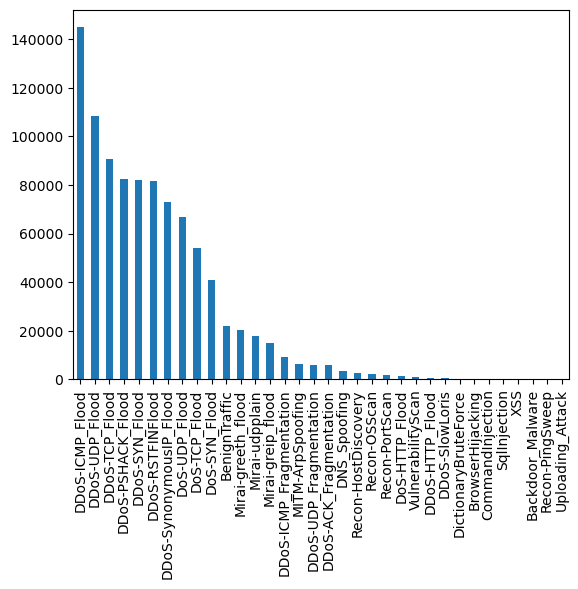

In [7]:
bar_graph('label')

In [8]:
df['label'].unique()

array(['DoS-UDP_Flood', 'DDoS-SynonymousIP_Flood', 'DDoS-RSTFINFlood',
       'DDoS-UDP_Flood', 'DDoS-PSHACK_Flood', 'DDoS-ICMP_Fragmentation',
       'DDoS-ICMP_Flood', 'DDoS-TCP_Flood', 'DoS-TCP_Flood',
       'DDoS-SYN_Flood', 'Mirai-udpplain', 'DoS-SYN_Flood',
       'Recon-HostDiscovery', 'DDoS-UDP_Fragmentation',
       'DDoS-ACK_Fragmentation', 'MITM-ArpSpoofing', 'BenignTraffic',
       'Mirai-greeth_flood', 'Mirai-greip_flood', 'Recon-PortScan',
       'DNS_Spoofing', 'DoS-HTTP_Flood', 'DDoS-SlowLoris', 'Recon-OSScan',
       'VulnerabilityScan', 'DDoS-HTTP_Flood', 'CommandInjection',
       'Uploading_Attack', 'DictionaryBruteForce', 'SqlInjection',
       'BrowserHijacking', 'XSS', 'Backdoor_Malware', 'Recon-PingSweep'],
      dtype=object)

In [9]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
df['label']=enc.fit_transform(df['label'])
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,182.00,17.00,64.00,22.362751,22.362751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1911.00,182.0,182.00,182.000000,0.000000,182.00,8.300743e+07,9.5,19.078784,0.000000,0.000000,0.00,141.55,21
1,2.437778,129.60,6.00,64.00,0.978382,0.978382,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.40,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.336252e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,12
2,0.000000,54.00,6.00,64.00,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.00,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.334496e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,9
3,0.453670,39173.00,17.00,64.00,4967.422026,4967.422026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.0,50.00,50.000000,0.000000,50.00,8.310643e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,14
4,0.000000,54.00,6.00,64.00,166.930829,166.930829,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.00,0.0,1.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.331469e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941802,0.002760,55.10,6.11,63.57,10.025180,10.025180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.80,54.0,54.80,54.043402,0.181119,54.20,8.303770e+07,9.5,10.396511,0.257655,0.830222,0.04,141.55,13
941803,9.817769,162.00,6.00,64.00,0.305568,0.305568,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.298588e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,19
941804,0.135718,43416.74,16.89,64.00,14379.992944,14379.992944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,527.16,50.0,52.16,50.138687,0.527399,50.24,8.348742e+07,9.5,10.013823,0.747672,3.122454,0.09,141.55,14
941805,0.000000,0.00,1.00,64.00,3.582342,3.582342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.313208e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,6


In [10]:
x=df.drop(columns=['label'])
y=df['label']

In [11]:
y

0         21
1         12
2          9
3         14
4          8
          ..
941802    13
941803    19
941804    14
941805     6
941806    14
Name: label, Length: 941807, dtype: int32

In [12]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [13]:
print("Training set:", len(x_train))
print("Testing set:", len(x_test))

Training set: 753445
Testing set: 188362


In [14]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [15]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)

log_acc=clf.score(x_test,y_test)
pred=clf.predict(x_test)

log_prec=precision_score(y_test,pred,average='weighted')
log_rec=recall_score(y_test,pred,average='weighted')
log_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',log_acc)
print('precision:', log_prec)
print('recall: ', log_rec)
print('f1: ', log_f1)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.8008250071670506
precision: 0.8064933132621975
recall:  0.8008250071670506
f1:  0.7665962715123958


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(n_estimators=100)
clf1.fit(x_train,y_train)
rf_acc=clf1.score(x_test,y_test)
pred=clf1.predict(x_test)

rf_prec=precision_score(y_test,pred,average='weighted')
rf_rec=recall_score(y_test,pred,average='weighted')
rf_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',rf_acc)
print('precision:', rf_prec)
print('recall: ', rf_rec)
print('f1: ', rf_f1)

accuracy: 0.993002834966713
precision: 0.9926520356313727
recall:  0.993002834966713
f1:  0.9924210216282499


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn.ensemble import AdaBoostClassifier

clf2=AdaBoostClassifier()
clf2.fit(x_train,y_train)
ada_acc=clf2.score(x_test,y_test)
pred=clf2.predict(x_test)

ada_prec=precision_score(y_test,pred,average='weighted')
ada_rec=recall_score(y_test,pred,average='weighted')
ada_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',ada_acc)
print('precision:', ada_prec)
print('recall: ', ada_rec)
print('f1: ', ada_f1)

accuracy: 0.7291651182297916
precision: 0.7088903097191004
recall:  0.7291651182297916
f1:  0.6507216819271039


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn.ensemble import GradientBoostingClassifier
clf3=GradientBoostingClassifier()
clf3.fit(x_train,y_train)
print('accuracy', clf3.score(x_test,y_test))

pred=clf3.predict(x_test)

print('precision: ', precision_score(y_test,pred,average='weighted'))
print('recall: ', recall_score(y_test,pred,average='weighted'))
print('f1:', f1_score(y_test,pred,average='weighted'))

accuracy 0.9858184255729189
precision:  0.9861669104580681
recall:  0.9858184255729189
f1: 0.9856663439882749


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# neural network

In [18]:
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout,SimpleRNN,Input,GRU
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, CSVLogger
from keras.utils.np_utils import to_categorical


In [19]:
Y = to_categorical(y)
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, random_state = 42, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(753445, 46)
(753445, 34)
(188362, 46)
(188362, 34)


In [21]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [22]:

input_=Input(shape=(x_train.shape[1],))
d=Dense(100, activation='relu')(input_)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
output = Dense(34, activation='softmax')(d)

model = Model(inputs=input_, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 46)]              0         
                                                                 
 dense (Dense)               (None, 100)               4700      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100 

In [23]:
#callbacks: checkpoint, csv_logger
filepath="nn.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
csv_log=CSVLogger('nn_log.csv',separator=',',append=False)
callbacks_list=[checkpoint,csv_log]

history=model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/20
9404/9419 [============================>.] - ETA: 0s - loss: 0.4294 - accuracy: 0.8096
Epoch 1: val_accuracy improved from -inf to 0.80253, saving model to nn.hdf5
9419/9419 [==============================] - 16s 2ms/step - loss: 0.4292 - accuracy: 0.8097 - val_loss: 0.4779 - val_accuracy: 0.8025
Epoch 2/20
9376/9419 [============================>.] - ETA: 0s - loss: 0.1894 - accuracy: 0.9253
Epoch 2: val_accuracy improved from 0.80253 to 0.94941, saving model to nn.hdf5
9419/9419 [==============================] - 16s 2ms/step - loss: 0.1891 - accuracy: 0.9255 - val_loss: 0.1413 - val_accuracy: 0.9494
Epoch 3/20
9410/9419 [============================>.] - ETA: 0s - loss: 0.1163 - accuracy: 0.9557
Epoch 3: val_accuracy improved from 0.94941 to 0.96592, saving model to nn.hdf5
9419/9419 [==============================] - 16s 2ms/step - loss: 0.1163 - accuracy: 0.9557 - val_loss: 0.0882 - val_accuracy: 0.9659
Epoch 4/20
9401/9419 [============================>.] - ETA: 0s - l

Text(0, 0.5, 'accuracy')

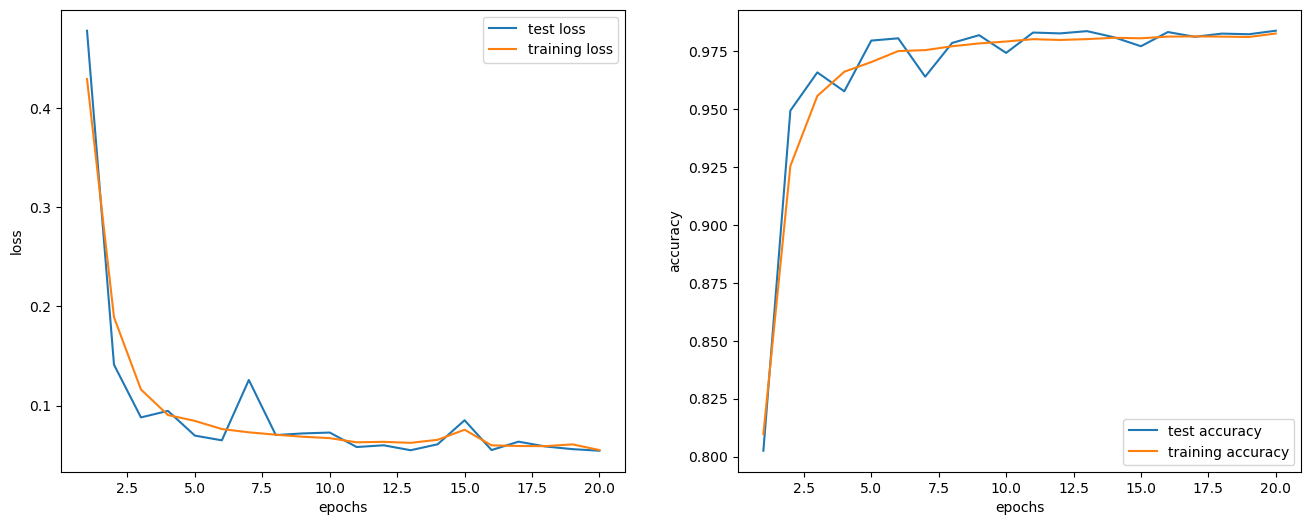

In [24]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(np.arange(1,21,1),history.history['val_loss'], label='test loss')
plt.plot(np.arange(1,21,1),history.history['loss'], label='training loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(np.arange(1,21,1),history.history['val_accuracy'], label='test accuracy')
plt.plot(np.arange(1,21,1),history.history['accuracy'], label='training accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [25]:
#load the best model
dnn=load_model('nn.hdf5')

#getting the probabilities
pred=dnn.predict(x_test)
pred
dnn_pred=pred.argmax(axis=1)
y_test1=y_test.argmax(axis=1)
accuracy_score(y_test.argmax(axis=1),pred.argmax(axis=1))
print('Precision score: ',precision_score(y_test1, dnn_pred, average='weighted'))
print('Recall score: ',recall_score(y_test1, dnn_pred,average='weighted'))
print('F1 score: ',f1_score(y_test1, dnn_pred,average='weighted'))

5887/5887 [==============================] - 6s 1ms/step
Precision score:  0.9812539357586012
Recall score:  0.9831494675146791
F1 score:  0.9810085375271759


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
